## Hugging Face Hub Dataset
- [Github](https://github.com/huggingface/datasets)
- [Hugging Face Datasets Documentation](https://github.com/huggingface/datasets)
- [Hugging Face Datasets](https://huggingface.co/datasets)

In [17]:
from datasets import list_datasets
all_datasets = list_datasets()

In [18]:
print(f"There are {len(all_datasets)} datasets available on the Hub.")
print(f"The first 100 are: {all_datasets[:100]}")

There are 43979 datasets available on the Hub.
The first 100 are: ['acronym_identification', 'ade_corpus_v2', 'adversarial_qa', 'aeslc', 'afrikaans_ner_corpus', 'ag_news', 'ai2_arc', 'air_dialogue', 'ajgt_twitter_ar', 'allegro_reviews', 'allocine', 'alt', 'amazon_polarity', 'amazon_reviews_multi', 'amazon_us_reviews', 'ambig_qa', 'americas_nli', 'ami', 'amttl', 'anli', 'app_reviews', 'aqua_rat', 'aquamuse', 'ar_cov19', 'ar_res_reviews', 'ar_sarcasm', 'arabic_billion_words', 'arabic_pos_dialect', 'arabic_speech_corpus', 'arcd', 'arsentd_lev', 'art', 'arxiv_dataset', 'ascent_kb', 'aslg_pc12', 'asnq', 'asset', 'assin', 'assin2', 'atomic', 'autshumato', 'facebook/babi_qa', 'banking77', 'bbaw_egyptian', 'bbc_hindi_nli', 'bc2gm_corpus', 'beans', 'best2009', 'bianet', 'bible_para', 'big_patent', 'billsum', 'bing_coronavirus_query_set', 'biomrc', 'biosses', 'blbooks', 'blbooksgenre', 'blended_skill_talk', 'blimp', 'blog_authorship_corpus', 'bn_hate_speech', 'bnl_newspapers', 'bookcorpus', 'boo

In [19]:
from datasets import load_dataset
emotions = load_dataset("emotion")

No config specified, defaulting to: emotion/split
Found cached dataset emotion (/Users/david/.cache/huggingface/datasets/emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd)


  0%|          | 0/3 [00:00<?, ?it/s]

In [20]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [21]:
train_ds = emotions["train"]
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

The `Dataset` class is one of the core data structures in Hugging Face Datasets. It behaves like a Python array.  It is based on [Apache Arrow](https://arrow.apache.org/) (a memory efficient typed columnar format).

In [22]:
len(train_ds)

16000

In [23]:
train_ds[1]

{'text': 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'label': 0}

In [24]:
train_ds.column_names

['text', 'label']

In [25]:
train_ds.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

In [26]:
train_ds[:10]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy',
  'ive been feeling a little burdened lately wasnt sure why that was',
  'ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny',
  'i feel as confused about life as a teenager or as jaded as a year old man',
  'i have been with petronas for years i feel that petronas has performed well and made a huge profit',
  'i feel romantic too'],
 'label': [0, 0, 3, 2, 3, 0, 5, 4, 1, 2]}

note that, the `ds` values are now lists.

In [27]:
train_ds["text"][:5]

['i didnt feel humiliated',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'im grabbing a minute to post i feel greedy wrong',
 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
 'i am feeling grouchy']

### Alternative ways to load datasets

In [28]:
%%html
<style>
    table { display: inline-block; }
    .rendered_html tr, .rendered_html th, .rendered_html td { text-align: left; }
</style>


### How to load datasets in various formats not on Hugging Face Hub


| Data format | Loading script | Example                                             |
| ----------- | -------------- | --------------------------------------------------- |
| CSV         | csv            |  `load_dataset("csv", data_files="my_file.csv")`    |
| Text        | text           |  `load_dataset("text", data_files="my_file.txt")`   |
| JSON        | json           |  `load_dataset("json", data_files="my_file.jsonl")` |


In [29]:
#hide_output
dataset_url = "https://huggingface.co/datasets/transformersbook/emotion-train-split/raw/main/train.txt"
!wget {dataset_url}

--2023-06-20 22:45:24--  https://huggingface.co/datasets/transformersbook/emotion-train-split/raw/main/train.txt
Resolving huggingface.co (huggingface.co)... 13.227.74.83, 13.227.74.46, 13.227.74.43, ...
Connecting to huggingface.co (huggingface.co)|13.227.74.83|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1658616 (1.6M) [text/plain]
Saving to: ‘train.txt.3’

train.txt.3         100%[===================>]   1.58M  6.37MB/s    in 0.2s    

2023-06-20 22:45:24 (6.37 MB/s) - ‘train.txt.3’ saved [1658616/1658616]



In [30]:
emotions_local = load_dataset("csv", data_files="train.txt", sep=";", names=["text", "label"])

Found cached dataset csv (/Users/david/.cache/huggingface/datasets/csv/default-1b8122bba3674c7e/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1)


  0%|          | 0/1 [00:00<?, ?it/s]

In [31]:
emotions_local

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
})

In [32]:
dataset_url = "https://huggingface.co/datasets/transformersbook/emotion-train-split/raw/main/train.txt"
emotions_remote = load_dataset("csv", data_files=dataset_url, sep=";", names=["text", "label"])

Found cached dataset csv (/Users/david/.cache/huggingface/datasets/csv/default-77d91d09868a1841/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1)


  0%|          | 0/1 [00:00<?, ?it/s]

In [33]:
emotions_remote

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
})

## From Datrasets to DataFrames

In [34]:
import pandas as pd

In [35]:
emotions.set_format(type="pandas")
df = emotions["train"][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [36]:
def label_int2str(row):
    return emotions["train"].features["label"].int2str(row)

df["label_name"] = df["label"].apply(label_int2str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


## Take a Closer Look at the Data

Whenever we are working a text classificatio problem, it's important to look at distribution across the classes.  Datasets with skewed class distributions might need different treatments for evaluation metrics compared to balanced ones. 

Text(0.5, 1.0, 'frequency of labels')

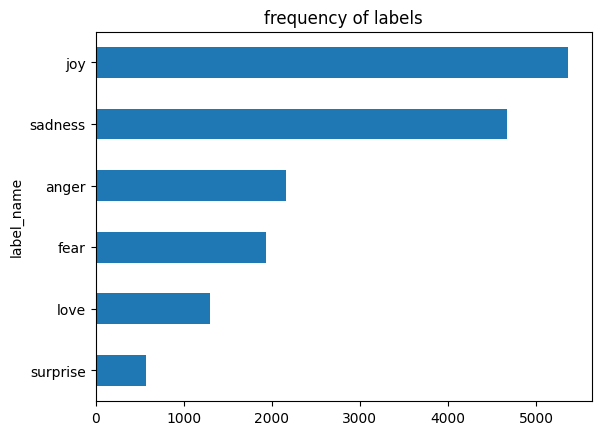

In [37]:
import matplotlib.pyplot as plt

df["label_name"].value_counts(ascending=True).plot.barh()
plt.title("frequency of labels")

`joy` and `sadness` are heavily skewed.

### some ways to deal with imbalanced data:
- randomly oversample the minority class.
- randomly undersample the majority class.
- gather more labeled data from the underrepresented classes.

[scikit-learn imblearn library](https://imbalanced-learn.org/stable/)

Make sure you **don't** apply sampling methods **before** creating your train/test splits, or you'll get leakage between them. 

### the distribution of the lengths of the tweets:

Transformer models have a max input sequence length (_maximum context size_). For *DistilBERT*, the _maxiumum context size_ is 512 tokens (a few paragraphs of text). Texts that are longer than a model's context size need to be truncated, which can lead to a loss in performance if the truncated text contains crucial information.

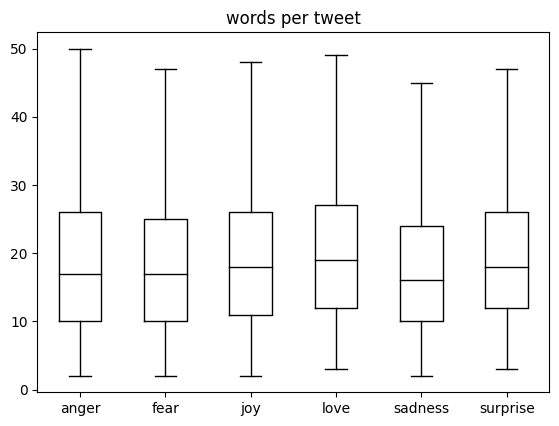

In [38]:
df["words per tweet"] = df["text"].str.split().apply(len)
df.boxplot("words per tweet", by="label_name", grid=False, showfliers=False, color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [39]:
emotions.reset_format()

## Text Tokenization

Transformer models cannot receive raw strings as iniput; instead, they assume text has been *tokenized* and *encoded* as numerical vectors. There are serveral tokenization strategies, and the optimal splitting of words into subunits is usually learned from the corpus.

### Character Tokenization

In [40]:
text = "Tokenizing text is a core task of NLP."
tokenized_text = list(text)
print(tokenized_text)

['T', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ', 'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o', 'f', ' ', 'N', 'L', 'P', '.']


In [41]:
len(tokenized_text)

38

In [42]:
def create_token2idx(tokenized_text):
    return {ch: idx for idx, ch in enumerate (sorted(set(tokenized_text)))}

In [43]:
token2idx = create_token2idx(tokenized_text)
print(token2idx)

{' ': 0, '.': 1, 'L': 2, 'N': 3, 'P': 4, 'T': 5, 'a': 6, 'c': 7, 'e': 8, 'f': 9, 'g': 10, 'i': 11, 'k': 12, 'n': 13, 'o': 14, 'r': 15, 's': 16, 't': 17, 'x': 18, 'z': 19}


In [44]:
def create_token_ids(tokenized_text, token2idx):
    return [token2idx[token] for token in tokenized_text]

In [45]:
input_ids = create_token_ids(tokenized_text, token2idx)
print(input_ids)

[5, 14, 12, 8, 13, 11, 19, 11, 13, 10, 0, 17, 8, 18, 17, 0, 11, 16, 0, 6, 0, 7, 14, 15, 8, 0, 17, 6, 16, 12, 0, 14, 9, 0, 3, 2, 4, 1]


Each character / token has now been mapped a unique numerical identifier.  Next, we'll need to convert `input_ids` to a 2D tensor of one-hot vectors.  One-hot vectors are frequently used in ML to encode categorical data, which could be ordinal or nominal. 

For example, suppose we wanted to encode the names of characters in the Transformers TV series. One way to do this would be to map each name to a unique ID, as follows:

In [46]:
categorical_df = pd.DataFrame({"Name": ["Bumblebee", "Optimus Prime", "Megatron"], "Label ID": [0,1,2]})
categorical_df

,Name,Label ID
0,Bumblebee,0
1,Optimus Prime,1
2,Megatron,2


The problem with this approach is tha+it creates a fictitious ordering between the names, and neural networks are really good at learning these kinds of relationships.

So instead, we create a new column for each category and assign a `1` where the category is true, and a `0`  otherwise.  Each row of the following table represents a *one-hot* vector, which has a single "hot" entry with a `1` and `0`s everywhere else.

In [47]:
pd.get_dummies(categorical_df["Name"], dtype=int)

,Bumblebee,Megatron,Optimus Prime
0,1,0,0
1,0,0,1
2,0,1,0


Note that `input_ids` have a similar problem: the elements create an ordinal scale. So, adding or subtracting two IDs is a meaningless operation, since the result is a new ID that represents another random token.

On the other hand, the result of adding two one-hot encodings can easily be interpreted: two entries that are "hot" indicate the corresponding tokens co-occur.

In [48]:
import torch
import torch.nn.functional as F

In [49]:
input_ids_tensor = torch.tensor(input_ids)
one_hot_encodings = F.one_hot(input_ids_tensor, num_classes=len(token2idx))
one_hot_encodings.shape

torch.Size([38, 20])

Each of the `38` tokens in the sentence now has a one-hot vector with `20` dimensions since our vocablulary consists of `20` unique characters.

Note: it's important to **always** set `num_classes` in the `one_hot()` function because otherwise the one-hot vectors may endup being shorter than the length of the vocabulary (and need to be padded with `0`s manually). In _TensorFlow_, the equivalent function is `tf.one_hot()`, where the `depth` argument is equivalent to `num_classes`. 

In [50]:
print(f"Token: {tokenized_text[0]}")
print(f"Tensor: {input_ids_tensor[0]}")
print(f"one-hot: {one_hot_encodings[0]}")

Token: T
Tensor: 5
one-hot: tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


Character-level tokenization ignores any structure in the text and treats the whole string as a stream of characters. This helps with misspellings and rare words, it still **needs to learn the linguistic structures** such as words from the data.  To learn these structures, it'll require significant more compute, memory, and data. For this reason, character tokenization is rarely used in practice.  Instead, some strucrture of the text is preserved during the tokenization step, e.g. _word tokenization_.

### Word Tokenization

In [51]:
tokenized_text_by_word = text.split()
print(tokenized_text_by_word)

['Tokenizing', 'text', 'is', 'a', 'core', 'task', 'of', 'NLP.']


In [52]:
word2idx = create_token2idx(tokenized_text_by_word)
input_word_ids = create_token_ids(tokenized_text_by_word, word2idx)
print(word2idx)
print(input_word_ids)

{'NLP.': 0, 'Tokenizing': 1, 'a': 2, 'core': 3, 'is': 4, 'of': 5, 'task': 6, 'text': 7}
[1, 7, 4, 2, 3, 6, 5, 0]


In [53]:
input_word_ids_tensor = torch.tensor(input_word_ids)
one_hot_word_encodings = F.one_hot(input_word_ids_tensor, num_classes=len(word2idx))
one_hot_word_encodings.shape

torch.Size([8, 8])

In [54]:
print(f"Token: {tokenized_text_by_word[0]}")
print(f"Tensor: {input_word_ids_tensor[0]}")
print(f"one-hot: {one_hot_word_encodings[0]}")

Token: Tokenizing
Tensor: 1
one-hot: tensor([0, 1, 0, 0, 0, 0, 0, 0])


note: usually stemming and lmmatization is applied to words to normalize the token, e.g. "great", "greater", "greatest" all become just "great".  This is at the expense of losing some information in the text.

Using words as tokens has a major draw back: the vocabulary can get extremely large (millions of input parameters).  A common way to tackle this problem is to limit the vocabulary to a set of most common words (say 100,000), and all otehr words are classifed / mapped to an unknown token (`UNK`).  This is means that we could potentially lose some important information since the model has no information about words assocated with `UNK`. 

### Subword Tokenization

In [55]:
from transformers import AutoTokenizer
model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

`AutoTokenizer` belongs to a [set of "auto" classes](https://huggingface.co/docs/transformers/model_doc/auto) whose job is to automatically retrieve the model's configuration, pretrained weights, or vocabulary from the name of the checkpoint. 

Alternatively, we can explicitly use `DistillBERT`'s tokenizer class manually:

In [56]:
from transformers import DistilBertTokenizer
distilbert_tokenizer = DistilBertTokenizer.from_pretrained(model_ckpt)

In [57]:
encoded_text = tokenizer(text)
encoded_text

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [58]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '.', '[SEP]']


#### Note:

- `[CLS]` & `[SEP]` are tokens to mark the start and end of a sequence.
- all words have been lower-cased, which is a feature of this particular checkpoint.
- "tokenizing" & "NLP" have been split into two tokens with `##` prefix to denote uncommon words.
  - `##` means the precediing string is not whitespace; any token with this prefix should be merged with the previous token when converting them back a string.

print(tokenizer.convert_tokens_to_string(tokens))

In [59]:
tokenizer.vocab_size

30522

In [60]:
tokenizer.model_max_length

512

In [61]:
tokenizer.model_input_names # input names the model expects int its forward pass

['input_ids', 'attention_mask']

> warning: When using pretrained models, it is really important to make sure that you use the same tokenizer that the model was trained with. From the model's perspective, switching the tokenizer is like shuffling the vocabulary. If everyone around you started swapping random words like "house" for "cat," you'd have a hard time understanding what was going on too!

### Tokenizing the Whole Dataset

In [62]:
def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

In [63]:
print(tokenize(emotions["train"][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


- `padding=True` will pad the training data with `0`s to the size of the longest one in a batch.
- `truncation=True` will trucnate the training examples to the model's _maximum context size_.

In [64]:
speical_tokens2ids = list(zip(tokenizer.all_special_tokens, tokenizer.all_special_ids))
sorted_speical_tokens2ids = sorted(speical_tokens2ids, key=lambda x : x[-1])
df = pd.DataFrame(sorted_speical_tokens2ids, columns=["Special Token", "Special Token ID"])
df.T

,0,1,2,3,4
Special Token,[PAD],[UNK],[CLS],[SEP],[MASK]
Special Token ID,0,100,101,102,103


`attention_mask` allows the model to ignore the padded parts of the input.

In [65]:
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

We use `DatasetDict.map()` here apply the processing function for each batch of the training examples and returns a new `DatasetDict` instance.
- `batched=True` will encode thw tweets in batches
- `batch_size=None` means our `tokenize()` function will be appied on the full dataset as a single batch. 

This ensure the input tensors and attention masks have ghe same shape globally.

In [66]:
emotions_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

In [67]:
emotions_encoded.column_names

{'train': ['text', 'label', 'input_ids', 'attention_mask'],
 'validation': ['text', 'label', 'input_ids', 'attention_mask'],
 'test': ['text', 'label', 'input_ids', 'attention_mask']}

In [68]:
emotions_encoded["train"].column_names

['text', 'label', 'input_ids', 'attention_mask']

In [69]:
print(emotions_encoded['train'][0])

{'text': 'i didnt feel humiliated', 'label': 0, 'input_ids': [101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}


## Training a Text Classifer

Models like `DistilBERT` are pretrained to predict masked words in a sequence of text.  We can't just use them for text classification.  We need to modify thme slightly.

### How enocder-based models work

- text is tokenized and represented as one-hot vectors called _token encodings_.
  - size of the tokenizer vocabulary determines the dimension of the _token encodings_, usually 20k-200k unique tokens.
- _token encodings_ are converted to lower-demnsional vectors called _token embeddings_.
- _token embeddings_ are then passed through the encoder block layer to yied a _hidden state_ for **each input token**.
  - for pretraining objective of langauge modeling, each hidden state is fed to a layer that **predicts the masked input tokens**.
  - for classification task, we replace the language modeling layer with a classification layer.

> PyTorch skips the step of creating one-hot vectors for token encodings because mulitplying a matrix w/ a one-hot vector is the same asd selecting a column from the matrix. Done by selecting the column w/ the token ID from the matrix, i.e. `nn.Embedding`. 

To build a classifier on top of `DistilBERT`, we have two options:
1. _Feature Extraction_: use the hidden states as features & just train a classifier on them, without modifying the pretrained model.
2. _Fine-tuning_: train the whole model end-to-end, updating the parameters of the pretrained model.

### Feature Extraction from Transformers

To extract features using a transfomer's pretrained model: 
- **freeze the body's weights** during training.
- **use the hidden states as features** for the classifer.

Advantages to the feature extraction:
- quickly train a smaller or shallower model.
- the smaller model can be a neural classification layer or another classification method like random forest.
- especially convenient if GPUs are unavailable (we can precompute the hidden states only once).

In [70]:
def torch_device():
    device = 'cpu'
    backends = torch.backends
    if torch.cuda.is_available() and backends.cuda.is_built(): # NVIDIA CUDA
        device = 'cuda'
    elif backends.mps.is_available() and backends.mps.is_built(): # Apple Sillicon
        device = 'mps'
    return torch.device(device)


In [249]:
from transformers import AutoModel

device = torch_device()
# device = torch.device('cpu') # mps doesn't seem to work 
model = AutoModel.from_pretrained(model_ckpt).to(device)

In [72]:
model_without_device =  AutoModel.from_pretrained(model_ckpt)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


#### Interoperability Between Framworks

In [73]:
from transformers import TFAutoModel
tf_xlmr = TFAutoModel.from_pretrained("xlm-roberta-base", from_pt=True) # from pyTorch

Downloading:   0%|          | 0.00/615 [00:00<?, ?B/s]

2023-06-20 22:45:34.377547: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Max
2023-06-20 22:45:34.377568: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 96.00 GB
2023-06-20 22:45:34.377570: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 36.00 GB
2023-06-20 22:45:34.377600: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-06-20 22:45:34.377613: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Downloading:   0%|          | 0.00/1.04G [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFXLMRobertaModel: ['lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.dense.bias']
- This IS expected if you are initializing TFXLMRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFXLMRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFXLMRobertaModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFXLMRobertaModel for predictions without further training.


#### Extract Hidden States

In [74]:
test_text = "this is a test"
test_inputs = tokenizer(test_text, return_tensors="pt")
print(f"input tensor shape: {test_inputs['input_ids'].size()}")
print(f"input tensors: {test_inputs}")
print(f"input tokens: {tokenizer.convert_ids_to_tokens(test_inputs.input_ids[0])}")

input tensor shape: torch.Size([1, 6])
input tensors: {'input_ids': tensor([[ 101, 2023, 2003, 1037, 3231,  102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]])}
input tokens: ['[CLS]', 'this', 'is', 'a', 'test', '[SEP]']


`test_inputs['input_ids']` is a tesnor with the shape: `[batch_size, n_tokens]`.

In [75]:
test_model_inputs = {k:v.to(device) for k, v in test_inputs.items()}
# note that the following throws a "RuntimeError: Placeholder storage has not been allocated on MPS device!"
# test_outputs = model(**test_inputs) # throws a runtime error 
# so, we'll pass the arguments manually
with torch.no_grad():
    test_outputs = model(
        input_ids = test_model_inputs['input_ids'], 
        attention_mask= test_model_inputs['attention_mask'])
print(test_outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]],
       device='mps:0'), hidden_states=None, attentions=None)


> `torch.no_grad()` context manager disables the automatic calculation of the graident. This is useful for inference since it reduces the memory footprint ofthe computations.

Depending on the model configuration, the output can contain several objects: hidden states, losses, or attentions.
`BaseModelOutput` is similar to a Python `namedtuple`. The current model only has one attribute: `last_hidden_state`.

In [76]:
test_outputs.last_hidden_state.size()

torch.Size([1, 6, 768])

`test_outputs.last_hidden_state` is a tensor with the shape: `[batch_size, n_tokens, hidden_dim]`, i.e. a 768-dimensional vector is returned for **each** of the input tokens. 

It's a 3-dimensional tensor where there is `1` batch with `6` sequences, and each sequence has a length of `768`.

For classification tasks, it's common to just use the hidden state associated with the starting `[CLS]` token as the **input feature**. Since this token appears at the start of each sequence, we can extract its vector by using the following:

In [77]:
cls_tensor = test_outputs.last_hidden_state[:, 0]
cls_tensor.shape

torch.Size([1, 768])

In [78]:
cls_tensor

tensor([[-1.5651e-01, -1.8620e-01,  5.2777e-02, -1.0634e-01, -1.3163e-02,
         -2.6944e-01,  9.2270e-02,  1.5865e-01, -9.8675e-02, -2.9572e-01,
         -1.3788e-01, -3.8061e-02, -5.3617e-02,  1.3045e-01,  3.9713e-02,
          8.6893e-02,  2.5087e-02,  8.6177e-03,  2.5243e-01, -1.3678e-01,
         -1.2137e-01, -1.3896e-01, -1.3426e-01, -9.0844e-02,  3.0509e-02,
         -3.8620e-02,  1.1485e-01, -5.7996e-02,  1.0131e-01,  9.7920e-02,
          3.8743e-03,  1.1950e-01, -6.6339e-02, -2.1257e-02,  1.3090e-01,
          2.6520e-02,  2.3624e-01,  5.0220e-02,  1.3503e-02, -2.1380e-02,
         -8.8323e-02, -9.8360e-02,  2.2675e-01, -2.4940e-02, -1.6261e-01,
         -8.3787e-02, -1.9629e+00, -1.4541e-01, -1.5582e-01, -3.5487e-01,
         -4.5971e-02,  2.0034e-01,  1.3080e-02,  4.9650e-01,  1.0587e-01,
          1.2080e-01, -1.9118e-01,  3.8280e-01,  1.7121e-02, -1.6628e-02,
          2.1525e-01,  4.4381e-02,  3.9334e-03,  3.5416e-02,  1.2238e-01,
          2.1459e-01,  1.5015e-02,  2.

`cls_tensor` contains the `[CLS]` vectors from all batches.

#### ChatGPT's explanation of why use `[CLS]` hidden state as the input feature for text classification:

Prompt:
> when training a classifier using the hidden state output from an encoder-based transformer model, why do people just just the hidden state assoicated with the `[CLS]` token as the input feature?

Answer:
>Using the hidden state associated with the `[CLS]` token as the input feature for training a classifier in encoder-based transformer models, such as BERT, is a common practice. This approach is known as "CLS pooling" or "sentence-level pooling."
>
>The primary reason for using the `[CLS]` token's hidden state is that it captures the aggregated representation of the entire input sequence. In the context of text classification, the goal is to classify the input text as a whole, rather than predicting the label for individual tokens. By using the `[CLS]` token's hidden state, you obtain a fixed-dimensional representation of the entire input sequence that can be fed into a classifier.
>
>The `[CLS]` token is positioned at the beginning of the input sequence and is specifically trained to encode information about the sequence as a whole. During the pre-training phase, the BERT model is trained on various language modeling tasks, including masked language modeling and next sentence prediction. These tasks encourage the model to learn a representation in the `[CLS]` token that captures important information about the input sequence.
>
>In addition, the `[CLS]` token's hidden state is directly connected to a classification layer during fine-tuning. During fine-tuning, the model is trained on a specific downstream task, such as sentiment analysis or text categorization. By using the `[CLS]` token's hidden state as the input feature, you leverage the pre-trained representation's ability to capture relevant information about the entire input sequence and then fine-tune it specifically for the classification task.
>
>It's worth noting that using the `[CLS]` token's hidden state as the input feature is not always the best approach for every task or dataset. In some cases, you may need to experiment with different pooling strategies or utilize additional techniques, such as attention mechanisms, to enhance the representation. However, the `[CLS]` token's hidden state provides a strong starting point for many text classification tasks due to its ability to capture the overall sequence information.

Prompt:
> what does the hidden state of a token like `[CLS]` actually represents?

Answer:
>The hidden state of a token like `[CLS]` in a transformer-based model, such as BERT, represents a contextualized representation of the entire input sequence. 
>
>In transformer models, each token in the input sequence is associated with a hidden state vector. This vector encodes the token's contextual information, which is a combination of the token's own semantics and its relationship with other tokens in the sequence.
>
>For the `[CLS]` token specifically, its hidden state is typically used as an aggregate representation of the entire sequence. During pre-training, the model is trained to predict whether two sentences are consecutive or not, and the `[CLS]` token's hidden state plays a crucial role in this task.
>
>The pre-training objective encourages the model to encode relevant information about the entire input sequence into the `[CLS]` token's hidden state. As a result, this hidden state tends to capture high-level semantics, global information, and contextual understanding of the input sequence.
>
>In the context of text classification, using the hidden state of the `[CLS]` token as an input feature leverages this learned representation. It allows the model to make predictions based on the overall understanding of the sequence, rather than focusing on individual tokens. The `[CLS]` token's hidden state can capture the most salient and discriminative features of the input sequence, making it suitable for tasks like sentence classification or sentiment analysis.
>
>However, it's important to note that the exact interpretation of the hidden state is not always straightforward. The hidden state is a dense vector representation learned through the model's training process, and its specific dimensions do not have a predefined meaning. Its usefulness lies in its ability to capture and encode relevant information about the input sequence for downstream tasks.

#### Extract batched (`[CLS]`) hidden states

In [79]:
def extract_hidden_states(batch):
    # place model inputs on the GPU
    device = torch_device()
    inputs = {k:v.to(device) for k, v in batch.items() 
              if k in tokenizer.model_input_names}
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state
    # Return vector for [CLS] token
    return {"hidden_state":  last_hidden_state[:,0].cpu().numpy()}

In [80]:
emotions_encoded.set_format("torch", columns=["input_ids", "attention_mask", "label"])
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

`DatasetDict.map()`'s `batched=True` argument will set the default `batched_size=1000`.

In [81]:
emotions_hidden["train"].column_names

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

a new column `hidden_state` has been added to our dataset.

In [82]:
print(emotions_hidden["train"]['hidden_state'].shape)
print(emotions_hidden)

torch.Size([16000, 768])
DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 2000
    })
})


#### Creating a feature matrix

We'll use the (`CLS`) hidden states as input features and labels as targets.

In [83]:
import numpy as np

X_train = np.array(emotions_hidden['train']['hidden_state'])
X_valid = np.array(emotions_hidden['validation']['hidden_state'])
y_train = np.array(emotions_hidden['train']['label'])
y_valid = np.array(emotions_hidden['validation']['label'])
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((16000, 768), (2000, 768), (16000,), (2000,))

##### Visualizing the training set

In [84]:
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler

/Users/david/code/python/nlp-with-transformers/venv/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/david/code/python/nlp-with-transformers/venv/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/david/code/python/nlp-with-tr

The [UMAP](https://umap-learn.readthedocs.io/en/latest/) algorithm projects the high dimensional vector down to 2D (great for visualization).  It works best when teh feaures are scaled to lie with in the [0,1] interval. 

In [85]:
# Scale features to [0,1] range
X_scaled = MinMaxScaler().fit_transform(X_train)

# Initialize & fit UMAP (project 768-dimension vectors down to 2-dimension)
mapper = UMAP(n_components=2, metric="cosine").fit(X_scaled)

# Create a DataFrame of the 2D embeddings
df_emb = pd.DataFrame(mapper.embedding_, columns=["X", "Y"])
df_emb["label"] = y_train
df_emb.head()

,X,Y,label
0,4.574046,6.906041,0
1,-2.683453,5.760426,0
2,5.894423,3.332808,3
3,-2.297074,3.132231,2
4,-3.001721,3.886827,3


In [86]:
cmaps = ["Greys", "Blues", "Oranges", "Reds", "Purples", "Greens"]
labels = emotions['train'].features['label'].names
print(labels)
print(list(zip(labels, cmaps)))

['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
[('sadness', 'Greys'), ('joy', 'Blues'), ('love', 'Oranges'), ('anger', 'Reds'), ('fear', 'Purples'), ('surprise', 'Greens')]


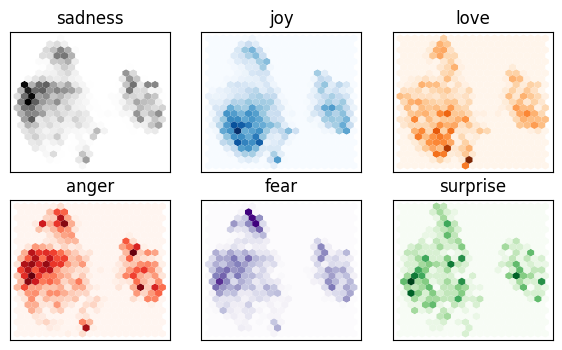

In [87]:
fig, axes = plt.subplots(2, 3, figsize=(7,4))
axes = axes.flatten()
for i, (label, cmap) in enumerate(zip(labels, cmaps)):
    df_emb_sub = df_emb.query(f"label == {i}")
    axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], cmap=cmap, gridsize=20, linewidth=(0,))
    axes[i].set_title(label)
    axes[i].set_xticks([]), axes[i].set_yticks([])

Patterns:
- negative feelings such as `sadness`, `anger`, and `fear` all occupy similar regions with slightly varying distributions
- `joy`, `love` are separated from the negative emotions and share similar space.
- `surprise` is scalled all over the place. 

We may hoped for some separtion, but it's not guaranteed since the `DistilBERT` model was not trained to know the difference between emotions.  It only learned the mimplicity by guessing the masked words in texts.

#### Train a simple classifier

In [212]:
import time

class MultiTrainer:
    def __init__(self, classifiers, training_input, training_output, validation_input, validation_output):
        self.classifiers = classifiers
        self.training_input = training_input
        self.training_output = training_output
        self.validation_input = validation_input
        self.validation_output = validation_output
    
    def train_with(self, classifier):
        start = time.time()
        classifier.fit(self.training_input, self.training_output)
        stop = time.time()
        return classifier.score(self.validation_input, self.validation_output), stop - start

    def train(self):
        results = []
        for clf in classifiers:
            score, training_time = self.train_with(clf)
            results.append((clf, score, training_time))
        return results

In [253]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, HistGradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import SVC

classifiers = [
    DummyClassifier(strategy="most_frequent"),
    LogisticRegression(max_iter=5000), # We increase `max_iter` to guarantee convergence
    AdaBoostClassifier(n_estimators=200),
    HistGradientBoostingClassifier(max_iter=5000),
    RandomForestClassifier(n_estimators=200),
    DecisionTreeClassifier(),
    GaussianNB(),
    BernoulliNB(),
    SVC(),
]
multi_trainer = MultiTrainer(
            classifiers=classifiers, 
            training_input=X_train, 
            training_output=y_train,
            validation_input=X_valid,
            validation_output=y_valid)
results = multi_trainer.train()

for clf, score, training_time in results:
    print(f"{clf.__class__.__name__} - score: {score}, training time: {training_time:.2f}s.")

DummyClassifier - score: 0.352, training time: 0.00s.
LogisticRegression - score: 0.6335, training time: 552.36s.
AdaBoostClassifier - score: 0.507, training time: 25093.46s.
HistGradientBoostingClassifier - score: 0.5735, training time: 18.23s.
RandomForestClassifier - score: 0.524, training time: 49.37s.
DecisionTreeClassifier - score: 0.3515, training time: 11.08s.
GaussianNB - score: 0.4045, training time: 0.03s.
BernoulliNB - score: 0.419, training time: 0.11s.
SVC - score: 0.583, training time: 90.71s.


It might appear that our model is just a bit better than random at predicting emotions, but since our dataset is unbalanced across the classes, it's actually sigificantly better.  We can examine whether our model is any good by comparing it against a simple baseline model, i.e. `DummyClassifier`.

`DummyClassifier` can use simple hueristics (`strategy`) such as choosing the majority class (`most_frequent`).  Since this will be the best-performing heuristic against our dataset, 

In [220]:
def find_classifier(classifier_class, classifiers):
    return next(clf for clf in classifiers if clf.__class__ == classifier_class)

In [221]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_predictions, y_true, labels):
    cm = confusion_matrix(y_true, y_predictions, normalize="true")
    fig, ax = plt.subplots(figsize=(6,6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("normalized confusion matrix")
    plt.show


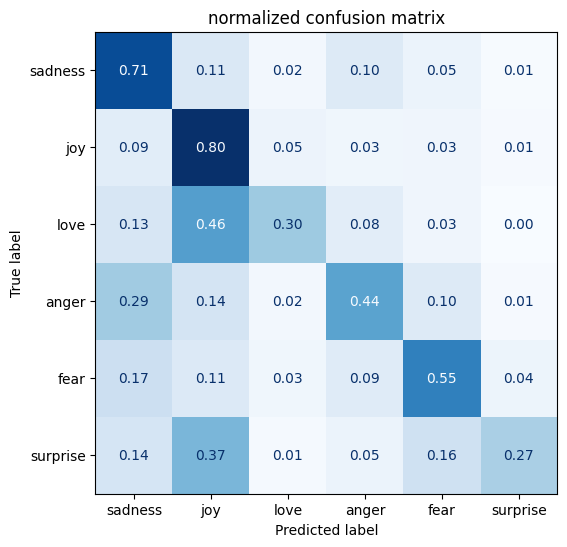

In [222]:
lr_clf = find_classifier(LogisticRegression, classifiers)
y_preds = lr_clf.predict(X_valid)
plot_confusion_matrix(y_preds, y_valid, labels)

`anger` and `fear` are most often confused with `sadness`, which agress with our initial visualization observation.  
`love` and `surprise` are frequently mistaken with `joy`.

In [251]:
def classifier_predict(classifier, tokenizer, labels, text):
    tensors = tokenizer(text, return_tensors="pt")
    device = torch_device()
    inputs = {k:v.to(device) for k, v in tensors.items() 
              if k in tokenizer.model_input_names}
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state
    # vector for [CLS] token
    embeddings = last_hidden_state[:,0].cpu().numpy()
    predictions = classifier.predict(embeddings)
    return labels[predictions[0]]

In [271]:
tweets = [
    "I feel so happy that I've met you!",
    "You suck!",
    "what is going on with the world?",
    "wtf is wrong with you?",
    "wat???",
    "what is happening here?", 
    "can someone explain what is chatgpt?",
    "… attack on the military-industrial complex. The lobbying power of large government contractors is far higher than it should be for the good of the people.",
    "do or doin't. there is no try.",
    "joy to the world",
    "Imagination is more important than knowledge",
    "wow, is this really happening?",
    "no way.  this cannot be happening.",
    "I feel so sad. I want to cry."
]
for clf in classifiers:
    print(f"-----{clf.__class__}-----")
    for tweet in tweets:
        emotion = f"({classifier_predict(clf, tokenizer, labels, tweet)})"
        print(f"{emotion:10}{tweet}")
    print("\n")

-----<class 'sklearn.dummy.DummyClassifier'>-----
(joy)     I feel so happy that I've met you!
(joy)     You suck!
(joy)     what is going on with the world?
(joy)     wtf is wrong with you?
(joy)     wat???
(joy)     what is happening here?
(joy)     can someone explain what is chatgpt?
(joy)     … attack on the military-industrial complex. The lobbying power of large government contractors is far higher than it should be for the good of the people.
(joy)     do or doin't. there is no try.
(joy)     joy to the world
(joy)     Imagination is more important than knowledge
(joy)     wow, is this really happening?
(joy)     no way.  this cannot be happening.
(joy)     I feel so sad. I want to cry.


-----<class 'sklearn.linear_model._logistic.LogisticRegression'>-----
(joy)     I feel so happy that I've met you!
(anger)   You suck!
(anger)   what is going on with the world?
(sadness) wtf is wrong with you?
(sadness) wat???
(fear)    what is happening here?
(fear)    can someone explain wh

## Fine-Tuning Transformers

Fine-tuning does not use hidden states as fixed features, instead the entire model is trained along with the classification head. Training the hidden states that serve as inputs to the lassification 

### Loading a pretrained model for classification fine-tuning

In [244]:
from transformers import AutoModelForSequenceClassification

num_labels = 6 # 6 emotions
model_for_classification = AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels=num_labels).to(device)

`AutoModelForSequenceClassification` is like `AutoModel` but with a clasdsification head on top of the pretrained model outputs, which can be easily trained with the base model.  We just need to specified how many labels the model has to predict.

### Defining the performance metrics

In [100]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

To monitor metrics during training, we need to define a `compute_metrics()` function for the `Trainer`.  The function receives an `EvalPrediction` object (a named tuple w/ `predicitons` and `labeled_id` attributes).  It needs to return a dictionary that maps each metric's name to its value.  We're using the F1-score and accuracy of the model as our evaulation metrics.

`f1_score` is defined as [Harmonic means](https://www.investopedia.com/terms/h/harmonicaverage.asp) of _Precision_ and _Recall_:
```
1/f1_score = 1/2 * (1/precision + 1/recall)
f1_score = (2 * precision * recall)/(precision + recall)
```

References about evaluation metrics:
- [Using Confusion Matrix and Accuracy to Test Classification Models](https://proclusacademy.com/blog/explainer/confusion-matrix-accuracy-classification-models/)
- [Precision, Recall, and F1 Score: When Accuracy Betrays You](https://proclusacademy.com/blog/explainer/precision-recall-f1-score-classification-models/).
- [Precision, Recall, and F1 Score: A Practical Guide Using Scikit-Learn](https://proclusacademy.com/blog/practical/precision-recall-f1-score-sklearn/)


### Training the model

In [246]:
from transformers import TrainingArguments

batch_size = 6
logging_steps = len(emotions_encoded['train']) // batch_size
model_name = f"{model_ckpt}-finetuned-emotion"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False, # progress bar
                                  logging_steps = logging_steps,
                                  push_to_hub=False,
                                  log_level="error")

In [247]:
from transformers import Trainer
trainer = Trainer(model=model_for_classification, args=training_args, compute_metrics=compute_metrics,
                  train_dataset=emotions_encoded["train"], eval_dataset=emotions_encoded["validation"],
                  tokenizer=tokenizer)

In [248]:
trainer.train()

/Users/david/code/python/nlp-with-transformers/venv/lib/python3.11/site-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.437700,0.219497,0.929500,0.929927
2,0.166100,0.181977,0.941000,0.940861


TrainOutput(global_step=5334, training_loss=0.3017948163384273, metrics={'train_runtime': 1582.0447, 'train_samples_per_second': 20.227, 'train_steps_per_second': 3.372, 'total_flos': 720342861696000.0, 'train_loss': 0.3017948163384273, 'epoch': 2.0})

In [116]:
preds_output = trainer.predict(emotions_encoded['validation'])
preds_output

PredictionOutput(predictions=array([[ 7.5695944, -2.2783434, -2.5306623, -2.0499625, -2.1550262,
        -2.9008427],
       [ 7.5319633, -2.2156653, -3.0009947, -1.8963985, -1.9080898,
        -2.9059296],
       [-2.9226015,  2.9242423,  4.962393 , -2.4134972, -2.804844 ,
        -2.9553733],
       ...,
       [-2.4811943,  7.9928765, -0.6634035, -1.9468262, -2.2723792,
        -2.1717534],
       [-3.3244858,  3.4072359,  4.3355427, -2.0363631, -2.627234 ,
        -2.7153826],
       [-2.3780553,  8.101249 , -1.2072536, -2.1216896, -2.1702175,
        -1.4693774]], dtype=float32), label_ids=array([0, 0, 2, ..., 1, 1, 1]), metrics={'test_loss': 0.17767806351184845, 'test_accuracy': 0.943, 'test_f1': 0.9430318112684176, 'test_runtime': 21.6, 'test_samples_per_second': 92.593, 'test_steps_per_second': 15.463})

In [115]:
emotions_encoded['validation']

Dataset({
    features: ['text', 'label', 'input_ids', 'attention_mask'],
    num_rows: 2000
})

`predict()` method retruns a `PredictionOutput` object that contains `arrays` of `predictions` and `label_ids`. 

In [106]:
preds_output.metrics

{'test_loss': 0.17767806351184845,
 'test_accuracy': 0.943,
 'test_f1': 0.9430318112684176,
 'test_runtime': 21.3532,
 'test_samples_per_second': 93.663,
 'test_steps_per_second': 15.642}

`predictions` is the raw predictions for each class. We can decode the raw predicitons greedily using `np.argmax()`.  This yields the predicted labels and has the same format as the labels returned by the Scikit-learn models in the feature-based approach.

In [161]:
y_preds = np.argmax(preds_output.predictions, axis=1)
y_preds

array([0, 0, 2, ..., 1, 2, 1])

In [153]:
preds_output.label_ids # actual labeled ids

array([0, 0, 2, ..., 1, 1, 1])

In [163]:
diff = (y_preds - preds_output.label_ids)
# import sys()
# with np.printoptions(threshold=sys.maxsize):
#     print(diff)
print(np.count_nonzero(diff))

114


In [165]:
len(y_preds), len(preds_output.label_ids)

(2000, 2000)

our predictions has an error rate of 114/2000 = 0.057 (5.7%), or 94.3% accuracy.

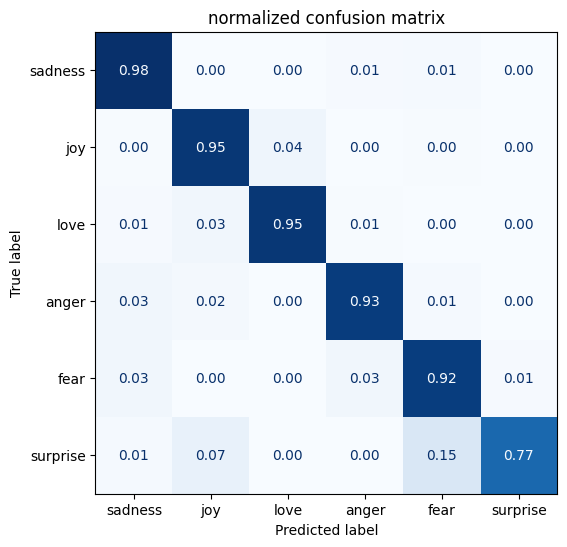

In [155]:
plot_confusion_matrix(y_preds, y_valid, labels)

This is much closer to our ideal diagonal confusion matrix.  The `love` category is still often confused with joy & surpised is mistaken for `fear` or `joy`. 

In [171]:
emotions['test'].features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

In [172]:
emotions_encoded['test'].features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None),
 'input_ids': Sequence(feature=Value(dtype='int32', id=None), length=-1, id=None),
 'attention_mask': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None)}

In [174]:
emotions['test'][0]

{'text': 'im feeling rather rotten so im not very ambitious right now',
 'label': 0}

In [274]:
# convert inputs (tweets) into a Dataset
from datasets import Dataset 
tweets_ds = Dataset.from_dict({"text": tweets})
print(f"tweets_ds: {tweets_ds}")

# encode text as input_ids
tweets_encoded = tweets_ds.map(tokenize, batched=True, batch_size=None)
print(f"tweets_encoded: {tweets_encoded}")

# prediction emotions
tweets_preds = trainer.predict(tweets_encoded)
print(tweets_preds)
int_label_preds = np.argmax(tweets_preds.predictions, axis=1)
print(f"int_label_preds: {int_label_preds}")

# convert int_label_preds to labels
tweets_pred_emotions = np.vectorize(lambda int_label : labels[int_label])(int_label_preds)
print(tweets_pred_emotions)

# print predicted labels w/ tweets
for i, tweet in enumerate(tweets_ds):
    emotion = f"({tweets_pred_emotions[i]})"
    print(f"{emotion:10} {tweet['text']}")

tweets_ds: Dataset({
    features: ['text'],
    num_rows: 14
})


Map:   0%|          | 0/14 [00:00<?, ? examples/s]

tweets_encoded: Dataset({
    features: ['text', 'input_ids', 'attention_mask'],
    num_rows: 14
})
PredictionOutput(predictions=array([[-2.4050655 ,  7.974109  , -1.0013708 , -2.539317  , -2.7525434 ,
        -2.3678005 ],
       [-0.29538885,  0.80408496, -2.1107514 ,  3.1372983 , -0.9639336 ,
        -3.22886   ],
       [-0.9856232 , -0.2841504 , -3.6220284 ,  2.2362924 ,  2.1055999 ,
        -2.1823356 ],
       [-1.3477324 , -1.1689988 , -3.474562  ,  5.2340226 ,  0.40440294,
        -2.924654  ],
       [-0.5288272 , -0.19084848, -2.5920334 ,  1.5951625 ,  1.6621213 ,
        -2.0128717 ],
       [-1.5749325 , -0.71107924, -3.7727745 ,  1.0608923 ,  3.634183  ,
        -1.6515876 ],
       [-1.1909035 ,  0.40587023, -3.3287578 ,  1.9245574 ,  1.8373855 ,
        -1.9805942 ],
       [-1.5718445 ,  1.1304473 , -2.0054815 ,  3.6006758 , -0.68181247,
        -3.327874  ],
       [-0.07804473,  1.3975824 , -2.3609138 ,  2.242118  , -0.3658206 ,
        -3.4875476 ],
       [-1.3874

####  Uploading Model to Hugging Face

In [345]:
from huggingface_hub import notebook_login
notebook_login()

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [357]:
# this doesn't work at the moment as we need to upgrade transformers to the latest version
# but it still requires Tensorflow < 2.13 since Tensorflow 2.13 is still in rc2.
trainer.args.push_to_hub = False
trainer.push_to_hub(commit_message="Finished Emotions fine-tuning from ch2 of nlp-with-transformers.")

TypeError: Repository.__init__() got an unexpected keyword argument 'private'

#### Save the models locally

To save the model locally, we can use the `Trainer.save_model()` method.

In [353]:
local_model_path = "./models/distilbert-base-uncased-finetuned-emotion/"
trainer.save_model(local_model_path)

In [354]:
local_model = AutoModelForSequenceClassification.from_pretrained(local_model_path, 
                                                                 num_labels=num_labels,
                                                                 label2id={'sadness':0, 'joy':1, 'love':2, 'anger':3, 'fear':4, 'surprise':5},
                                                                 id2label={0:'sadness', 1:'joy', 2:'love', 3:'anger', 4:'fear', 5:'surprise'},
                                                                )
local_model

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [323]:
from transformers import TextClassificationPipeline
local_tokenizer = AutoTokenizer.from_pretrained(local_model_path)
local_pipe = TextClassificationPipeline(model=local_model, tokenizer=local_tokenizer)
# torch.device('mps') is throwing: RuntimeError: Placeholder storage has not been allocated on MPS device!
# we'll switch to cpu for prediction for now.
local_model.to(torch.device('cpu'))

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [339]:
for tweet in tweets:
    # pred = local_pipe(tweet, return_all_scores=True)
    pred = local_pipe(tweet)
    print(tweet)
    print(pred)

I feel so happy that I've met you!
[{'label': 'joy', 'score': 0.9997610449790955}]
You suck!
[{'label': 'anger', 'score': 0.8674440979957581}]
what is going on with the world?
[{'label': 'anger', 'score': 0.4968463182449341}]
wtf is wrong with you?
[{'label': 'anger', 'score': 0.9886475205421448}]
wat???
[{'label': 'fear', 'score': 0.4457583725452423}]
what is happening here?
[{'label': 'fear', 'score': 0.9087695479393005}]
can someone explain what is chatgpt?
[{'label': 'anger', 'score': 0.45346468687057495}]
… attack on the military-industrial complex. The lobbying power of large government contractors is far higher than it should be for the good of the people.
[{'label': 'anger', 'score': 0.9019584655761719}]
do or doin't. there is no try.
[{'label': 'anger', 'score': 0.6192066073417664}]
joy to the world
[{'label': 'joy', 'score': 0.9976544976234436}]
Imagination is more important than knowledge
[{'label': 'joy', 'score': 0.9981180429458618}]
wow, is this really happening?
[{'label

#### Fine-Tunning with Keras (TensorFlow)

For Tensorflow, we can use the Keras API.  The main difference from the PyTorch API is that there is not `Traner` class, since Keras models already provide a built-in `fit()` method for training. 

In [389]:
from transformers import TFAutoModelForSequenceClassification

tf_model_for_classification = TFAutoModelForSequenceClassification.from_pretrained(model_ckpt, 
                                                                                  num_labels=num_labels)
tf_model_for_classification

We'll need to convert our datasets into the `tf.data.Datatset` format. Because we have already padded our otenized inputs, we can do this conversion easily by applying the `to_tf_dataset()` method to `emotions_encoded`.  We also shuffle the training dataset and definied the batch_size.

In [334]:
# The column names to convert to TensorFlow tensors
tokenizer_columns = tokenizer.model_input_names

tf_train_dataset = emotions_encoded['train'].to_tf_dataset(columns=tokenizer_columns, 
                                                           label_cols=['label'], 
                                                           shuffle=True,
                                                           batch_size=batch_size)
tf_eval_dataset = emotions_encoded['validation'].to_tf_dataset(columns=tokenizer_columns, 
                                                           label_cols=['label'], 
                                                           shuffle=False,
                                                           batch_size=batch_size)


In [337]:
import tensorflow as tf

tf_model_for_classification.compile(
#     optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
# WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs 
# slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, 
# located at `tf.keras.optimizers.legacy.Adam`.
    optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=5e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=tf.metrics.SparseCategoricalAccuracy())

In [338]:
tf_model_for_classification.fit(tf_train_dataset, validation_data=tf_eval_dataset, epochs=2)

Epoch 1/2


2023-06-21 16:54:42.251732: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2667/2667 [==============================] - ETA: 0s - loss: 0.4167 - sparse_categorical_accuracy: 0.8532

2023-06-21 16:58:42.418298: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2667/2667 [==============================] - 261s 95ms/step - loss: 0.4167 - sparse_categorical_accuracy: 0.8532 - val_loss: 0.2001 - val_sparse_categorical_accuracy: 0.9240
Epoch 2/2
2667/2667 [==============================] - 254s 95ms/step - loss: 0.1618 - sparse_categorical_accuracy: 0.9303 - val_loss: 0.1859 - val_sparse_categorical_accuracy: 0.9215


In [362]:
local_tf_model_path = "./models/tf-distilbert-base-uncased-finetuned-emotion"
tf_model_for_classification.save_pretrained(local_tf_model_path)

In [393]:
local_tf_model = TFAutoModelForSequenceClassification.from_pretrained(local_tf_model_path, 
                                                                      num_labels=num_labels,
                                                                      label2id={'sadness':0, 'joy':1, 'love':2, 'anger':3, 'fear':4, 'surprise':5},
                                                                      id2label={0:'sadness', 1:'joy', 2:'love', 3:'anger', 4:'fear', 5:'surprise'},
                                                                     )
local_tf_model

In [407]:
local_tf_encoded_input = local_tokenizer.encode("You suck!", padding=True, truncation=True, return_tensors="tf")
local_tf_encoded_input

<tf.Tensor: shape=(1, 5), dtype=int32, numpy=array([[  101,  2017, 11891,   999,   102]], dtype=int32)>

In [411]:
local_tf_pred = local_tf_model(local_tf_encoded_input)
local_tf_pred

TFSequenceClassifierOutput(loss=None, logits=<tf.Tensor: shape=(1, 6), dtype=float32, numpy=
array([[-0.13896966,  1.0460713 , -1.3655035 ,  0.7820544 ,  0.18823323,
        -0.58504486]], dtype=float32)>, hidden_states=None, attentions=None)

In [412]:
local_tf_pred_logits = local_tf_pred[0]
local_tf_pred_logits

<tf.Tensor: shape=(1, 6), dtype=float32, numpy=
array([[-0.13896966,  1.0460713 , -1.3655035 ,  0.7820544 ,  0.18823323,
        -0.58504486]], dtype=float32)>

In [413]:
local_tf_pred_probs = tf.nn.softmax(local_tf_pred_logits,axis=1).numpy()
print(f'The prediction probs are: {local_tf_pred_probs}')

The prediction probs are: [[0.10985138 0.3593042  0.03222023 0.27593145 0.15237297 0.07031978]]


In [414]:
labels[local_tf_pred_probs[0].argmax(-1)]

'joy'

In [415]:
for i, probability in enumerate(local_tf_pred_probs[0]):
    print(f"{labels[i]}: {probability}")

sadness: 0.10985138267278671
joy: 0.35930418968200684
love: 0.032220225781202316
anger: 0.2759314477443695
fear: 0.15237297117710114
surprise: 0.0703197792172432


In [394]:
local_tf_pipe = TextClassificationPipeline(model=local_tf_model, tokenizer=local_tokenizer)
for tweet in tweets:
    # pred = local_pipe(tweet, return_all_scores=True)
    pred = local_tf_pipe(tweet)
    print(tweet)
    print(pred)

I feel so happy that I've met you!
[{'label': 'joy', 'score': 0.8764247298240662}]
You suck!
[{'label': 'joy', 'score': 0.35930442810058594}]
what is going on with the world?
[{'label': 'fear', 'score': 0.8139909505844116}]
wtf is wrong with you?
[{'label': 'anger', 'score': 0.9559595584869385}]
wat???
[{'label': 'fear', 'score': 0.7025518417358398}]
what is happening here?
[{'label': 'fear', 'score': 0.7944713234901428}]
can someone explain what is chatgpt?
[{'label': 'fear', 'score': 0.7592072486877441}]
… attack on the military-industrial complex. The lobbying power of large government contractors is far higher than it should be for the good of the people.
[{'label': 'anger', 'score': 0.444684237241745}]
do or doin't. there is no try.
[{'label': 'fear', 'score': 0.6147090792655945}]
joy to the world
[{'label': 'joy', 'score': 0.8273923397064209}]
Imagination is more important than knowledge
[{'label': 'joy', 'score': 0.955780029296875}]
wow, is this really happening?
[{'label': 'joy

In [416]:
tf_valid_dataset = emotions_encoded['validation'].to_tf_dataset(columns=tokenizer_columns, 
                                                           label_cols=['label'], 
                                                           shuffle=False,
                                                           batch_size=batch_size)


/Users/david/code/python/nlp-with-transformers/venv/lib/python3.11/site-packages/datasets/arrow_dataset.py:388: FutureWarning: The output of `to_tf_dataset` will change when a passing single element list for `labels` or `columns` in the next datasets version. To return a tuple structure rather than dict, pass a single string.
Old behaviour: columns=['a'], labels=['labels'] -> (tf.Tensor, tf.Tensor)  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor)  
New behaviour: columns=['a'],labels=['labels'] -> ({'a': tf.Tensor}, {'labels': tf.Tensor})  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor) 
  warnings.warn(


In [433]:
tf_y_preds_output = local_tf_model.predict(tf_valid_dataset)

334/334 [==============================] - 16s 48ms/step


In [435]:
tf_y_preds = np.argmax(tf_y_preds_output.logits, axis=1)
tf_y_preds

array([0, 0, 2, ..., 1, 2, 1])

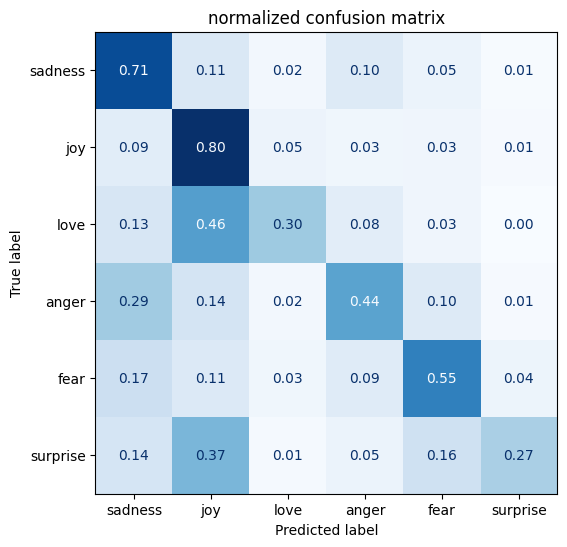

In [436]:
plot_confusion_matrix(y_preds, y_valid, labels)

#### Error Analysis

A simple (yet powerful) technique to investigate our model's predictions is to sort the validation samples by the model's loss.  When we pass the label during the forward pass, the loss is automatically calculated and returend. 

In [448]:
from torch.nn.functional import cross_entropy
local_model.to(device) # set local model back to device
def forward_pass_with_label(batch):
    # place all input tensors on the same device as the model
    inputs = {k:v.to(device) for k,v in batch.items() if k in tokenizer.model_input_names}

    with torch.no_grad():
        output = local_model(**inputs)
        pred_label = torch.argmax(output.logits, axis=-1)
        loss = cross_entropy(output.logits, batch["label"].to(device), reduction="none")
    # place output on CPU for compatibility with other dataset columns
    return {"loss": loss.cpu().numpy(), "predicted_label": pred_label.cpu().numpy()}

In [454]:
# convert dataset back to PyTorch tensors
emotions_encoded.set_format("torch", columns=["input_ids", "attention_mask", "label"])

# compute loss values
df_validation = emotions_encoded["validation"].map(forward_pass_with_label, batched=True, batch_size=16)
df_validation.set_format('pandas')
df_validation

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Dataset({
    features: ['text', 'label', 'input_ids', 'attention_mask', 'loss', 'predicted_label'],
    num_rows: 2000
})

In [462]:
cols = ["text", "label", "predicted_label", "loss"]
df_test = df_validation[:][cols]
display(df_test)
df_test["label"] = df_test["label"].apply(label_int2str)
df_test["predicted_label"] = df_test["predicted_label"].apply(label_int2str)
display(df_test)

,text,label,predicted_label,loss
0,im feeling quite sad and sorry for myself but ...,0,0,0.000287
1,i feel like i am still looking at a blank canv...,0,0,0.000300
2,i feel like a faithful servant,2,2,0.230387
3,i am just feeling cranky and blue,3,3,0.000572
4,i can have for a treat or if i am feeling festive,1,1,0.000250
...,...,...,...,...
1995,im having ssa examination tomorrow in the morn...,0,0,0.000275
1996,i constantly worry about their fight against n...,1,1,0.000263
1997,i feel its important to share this info for th...,1,1,0.000321
1998,i truly feel that if you are passionate enough...,1,2,1.531131


,text,label,predicted_label,loss
0,im feeling quite sad and sorry for myself but ...,sadness,sadness,0.000287
1,i feel like i am still looking at a blank canv...,sadness,sadness,0.000300
2,i feel like a faithful servant,love,love,0.230387
3,i am just feeling cranky and blue,anger,anger,0.000572
4,i can have for a treat or if i am feeling festive,joy,joy,0.000250
...,...,...,...,...
1995,im having ssa examination tomorrow in the morn...,sadness,sadness,0.000275
1996,i constantly worry about their fight against n...,joy,joy,0.000263
1997,i feel its important to share this info for th...,joy,joy,0.000321
1998,i truly feel that if you are passionate enough...,joy,love,1.531131


In [472]:
with pd.option_context('display.max_colwidth', None, 'display.max_rows', None):
    display(df_test.sort_values("loss", ascending=False).head(50))

,text,label,predicted_label,loss
1801,i feel that he was being overshadowed by the supporting characters,love,sadness,9.587017
1500,i guess we would naturally feel a sense of loneliness even the people who said unkind things to you might be missed,anger,sadness,8.700874
1963,i called myself pro life and voted for perry without knowing this information i would feel betrayed but moreover i would feel that i had betrayed god by supporting a man who mandated a barely year old vaccine for little girls putting them in danger to financially support people close to him,joy,sadness,8.691442
415,im kind of embarrassed about feeling that way though because my moms training was such a wonderfully defining part of my own life and i loved and still love,love,joy,7.943871
1919,i should admit when consuming alcohol myself in small amounts i feel much less inhibited ideas come to me more easily and i can write with greater ease,fear,sadness,7.941580
1195,i always think about are act the way i want to feel so even when im grumpy i still need to act pleasant and happy and then i will start to feel more that way,anger,joy,7.938544
1836,i got a very nasty electrical shock when i was tampering with some electrical applainces,fear,anger,7.305942
997,i feel as if there is anyone who really understands the insincere motives of females its me,anger,joy,7.216261
1683,i had applied for a job and they had assured me that the exams would take place a few months later a week later i went to obtain some more information and they told me that the exams had already taken place,anger,joy,6.743524
1124,someone acting stupid in public,anger,sadness,6.740613


Our job is now to detect one of the follows:
- _Wrong labels_: annotator mislabels
- _Quirks of dataset_: special characters or text etc.

Even though the model did predict quote a few labels incorrectly, some of the labels were also mislabeled. In particular, **joy** seems to be mislabeled several times.  We can now refined the dataset for gain performance. 

In [474]:
with pd.option_context('display.max_colwidth', None, 'display.max_rows', None):
    display(df_test.sort_values("loss", ascending=True).head(200))

,text,label,predicted_label,loss
876,i feel like the cool mom,joy,joy,0.000197
382,i feel cool because the plane has four seats instead of only two,joy,joy,0.000199
197,i feel so cool like ice t huhwe neun gatda beoryeo priceless sesang ye ban bani namja neottaemune na ulji anha gucha hage neoreul jabgeo na mae dallil ireun jeoldae no,joy,joy,0.000201
620,i shall move right along to the post interview portion of the day the results of which will be far more exciting and interesting to you i feel sure,joy,joy,0.000203
199,i feel invigorated full of energy ready for the day ahead,joy,joy,0.000204
892,i feel kinda cool,joy,joy,0.000206
1082,i feel the cool night air against my face,joy,joy,0.000206
1099,i feel invigorated when i look at this image just as i did when i looked at the other two photos,joy,joy,0.000206
911,i feel in love with a cute little maltese,joy,joy,0.000207
1567,i feel wonderful shayla admitted,joy,joy,0.000207


Deep learning models are very good at finding and exploiting shortcuts to get a predicton.  Looking at the lowest losses, it seems that our model are most confident when predicting **joy**.  It's worth inveseting time into looking at the examples that the model is most confident about, so that we can be confident that the model does not improperly exploit certain features of the text. Since **joy** seems to be mislabeld a lot, it's worth doing more investigation into the data.

<Axes: xlabel='label'>

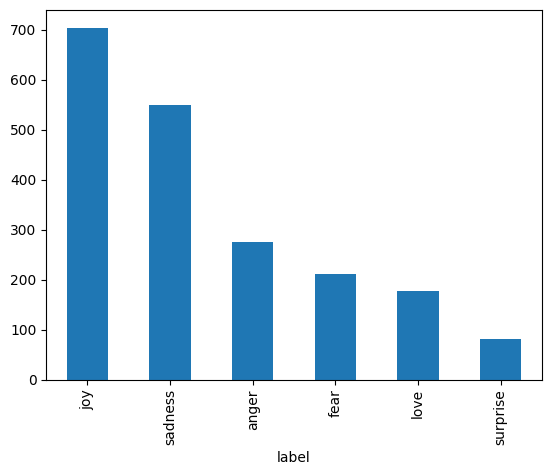

In [482]:
df_test['label'].value_counts().plot(kind="bar")

df_test['label_prediction'].value_counts().plot(kind="bar")